$$
\large \textbf{Problema 07}
$$

La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente expresión:

$$
F=\int_{0}^{30} 200\:\left(\frac{z}{5+z}\right)\:e^{-2z/30}\:dz
$$

donde $F$ está dada en $lb$ y las distancias en $ft$. Estime, utilizando los métodos de trapecios, de Simpson 1/3 y cuadraturas de Gauss, cuánto vale la fuerza total y dónde será el punto de acción efectiva de esta fuerza:

$$
d=\int_{0}^{30} z\:f(z)\:dz
$$

Utilice varios tamaños de paso de integración, entre $5$ y $0.05\:ft$, y estudie la convergencia de cada método.
***

In [1]:
import numpy as np                # Librería de álgebra lineal
import matplotlib.pyplot as plt   # Librería de gráficos
plt.rc('figure', figsize=(9,6))
plt.rc('font', size=14)

### Datos del problema

In [2]:
z0 = 0    # ft
zf = 30   # ft
h = 0.05  # ft

def f(z):
    return 200*z/(5+z)*np.exp(-2*z/30)

### Trapecios

In [3]:
def Trap(h, f=f, z0=0, zf=30):
    p = round((zf-z0)/h)
    z = np.linspace(z0, zf, p)
    
    suma = (f(z0)+f(zf))/2
    for i in range(1,p-1):
        suma += f(z[i])
    F = (zf-z0)/p*suma
    
    return F

In [4]:
FTrap = Trap(h)
D = lambda z: (1/FTrap)*z*200*(z/(5+z))*np.exp((-2*z)/30)
dTrap = Trap(h, D)

print('Paso:', h, 'ft')
print('  -  La fuerza total es', FTrap, 'lb')
print('  -  El punto de acción efectiva es', dTrap, 'ft')

Paso: 0.05 ft
  -  La fuerza total es 1478.0922191131897 lb
  -  El punto de acción efectiva es 13.053771931230958 ft


### Simpson 1/3

In [5]:
def Simp(h, f=f, z0=0, zf=30):
    p = round((zf-z0)/h)
#    if p%2==0:
#        return(print('Error: El metodo requiere una cantidad de pasos impar'))
    z = np.linspace(z0, zf, p)
    
    suma = f(z0)+f(zf)
    for i in range(1,p-1):
        if i%2==0:
            suma += 4*f(z[i])
        else:
            suma += 2*f(z[i])
    F = (zf-z0)/(3*(p-1))*suma
    
    return F

In [6]:
FSimp = Simp(h)
D = lambda z: (1/FSimp)*z*200*(z/(5+z))*np.exp((-2*z)/30)
dSimp = Trap(h, D)

print('Paso:', h, 'ft')
print('  -  La fuerza total es', FSimp, 'lb')
print('  -  El punto de acción efectiva es', dSimp, 'ft')

Paso: 0.05 ft
  -  La fuerza total es 1480.5517584233303 lb
  -  El punto de acción efectiva es 13.032086593296768 ft


### Cuadraturas de Gauss

In [7]:
# N° puntos: 1
wi1 = [2]
ti1 = [0]

# N° puntos: 2
wi2 = [1, 1]
ti2 = [-1/np.sqrt(3), 1/np.sqrt(3)]

# N° puntos: 3
wi3 = [8/9, 5/9, 5/9]
ti3 = [0, np.sqrt(3/5), -np.sqrt(3/5)]

# N° puntos: 4
wi4 = [(18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36, (18-np.sqrt(30))/36]
ti4 = [np.sqrt(3/7-2/7*np.sqrt(6/5)), -np.sqrt(3/7-2/7*np.sqrt(6/5)), np.sqrt(3/7+2/7*np.sqrt(6/5)), -np.sqrt(3/7+2/7*np.sqrt(6/5))]

# N° puntos: 5
wi5 = [128/255, (322+13*np.sqrt(70))/900, (322+13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900]
ti5 = [0, (1/3)*np.sqrt(5-2*np.sqrt(10/7)), -(1/3)*np.sqrt(5-2*np.sqrt(10/7)), (1/3)*np.sqrt(5+2*np.sqrt(10/7)), -(1/3)*np.sqrt(5+2*np.sqrt(10/7))]

In [8]:
def Gaus(wi, ti, f=f, z0=0, zf=30):
    n = len(wi)
    m = (zf-z0)/2
    b = (z0+zf)/2
    suma = 0
    h = lambda z: m*z+b
    for i in range(len(wi)):
        suma += wi[i]*f(m*ti[i]+b)
    F = suma*m
    return F, n

In [9]:
FGaus, nGaus = Gaus(wi2, ti2)
D = lambda z: (1/FGaus)*z*200*(z/(5+z))*np.exp((-2*z)/30)
dGaus, v = Gaus(wi2, ti2, D)

print('N° puntos:', nGaus)
print('  -  La fuerza total es', FGaus, 'lb')
print('  -  El punto de acción efectiva es', dGaus, 'ft')

N° puntos: 2
  -  La fuerza total es 1610.5722652945797 lb
  -  El punto de acción efectiva es 11.840301015775184 ft


### Convergencia de cada método

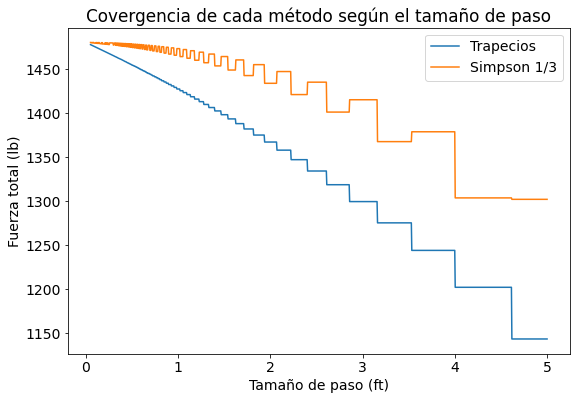

In [10]:
Trapecios = []
Simpson13 = []

h = np.linspace(0.05, 5, 1000)
for i,hi in enumerate(h):
    Trapecios.append(Trap(hi))
    Simpson13.append(Simp(hi))
    
plt.plot(h, Trapecios, '-', label='Trapecios')
plt.plot(h, Simpson13, '-', label='Simpson 1/3')
plt.title('Covergencia de cada método según el tamaño de paso')
plt.xlabel('Tamaño de paso (ft)')
plt.ylabel('Fuerza total (lb)')
plt.legend()
plt.show()

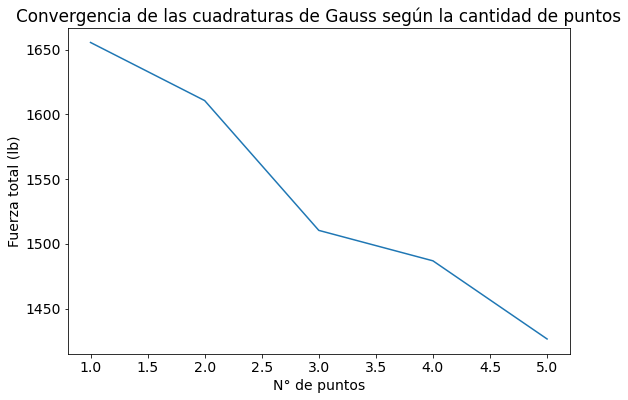

In [11]:
n = [1, 2, 3, 4, 5]
CuadGauss = [Gaus(wi1, ti1)[0]]
CuadGauss.append(Gaus(wi2, ti2)[0])
CuadGauss.append(Gaus(wi3, ti3)[0])
CuadGauss.append(Gaus(wi4, ti4)[0])
CuadGauss.append(Gaus(wi5, ti5)[0])

plt.plot(n, CuadGauss, '-')
plt.title('Convergencia de las cuadraturas de Gauss según la cantidad de puntos')
plt.xlabel('N° de puntos')
plt.ylabel('Fuerza total (lb)')
plt.show()